# 2 Regression Methods

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('/Users/jerry/Desktop/udemy courses/Kaggle数据分析/Avito Duplicate Ads Detection/train.csv')

In [3]:
X = train.drop(['Unnamed: 0', 'isDuplicate'],axis=1)

In [4]:
X.head()

,price,location,distance,description,title,category,region,parentCategory
0,0.0,1,0.00000,1.000000,1.000000,1,1,1
1,0.1,1,0.00000,0.922315,0.977778,1,1,1
2,0.0,1,0.00000,0.561137,0.981799,1,1,1
3,0.0,1,9.65594,0.999173,0.788961,1,1,1
4,0.2,1,0.00000,0.694822,0.360317,1,1,1


In [5]:
y = train[['isDuplicate']]

In [6]:
y.head()

,isDuplicate
0,1
1,1
2,0
3,1
4,1


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

From previous steps we know that distance, description, title are important factors analyzed by PCA. Let's see if there is obvious way to classify duplicated ads using these factors by scatter plots.

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651916 entries, 0 to 2651915
Data columns (total 10 columns):
Unnamed: 0        int64
isDuplicate       int64
price             float64
location          int64
distance          float64
description       float64
title             float64
category          int64
region            int64
parentCategory    int64
dtypes: float64(4), int64(6)
memory usage: 202.3 MB


In [9]:
import seaborn as sns
%matplotlib inline

We have in total 2651915 rows of data in the train dataset and we want to randomly choose 530383 for the scattle plots.

In [10]:
sample = train.sample(n=10000, random_state=1)

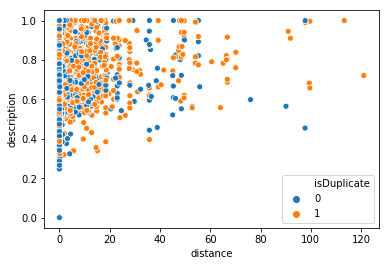

In [11]:
sns.scatterplot(data=sample, x='distance', y='description', hue='isDuplicate')

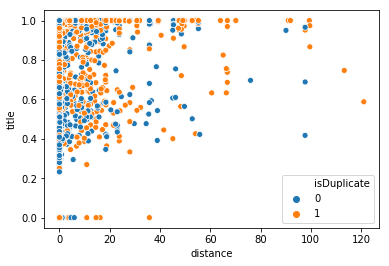

In [12]:
sns.scatterplot(data=sample, x='distance', y='title', hue='isDuplicate')

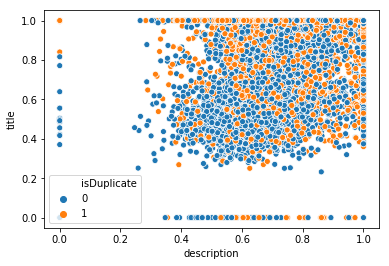

In [13]:
sns.scatterplot(data=sample, x='description', y='title', hue='isDuplicate')

## 2.1 Logistic Regression 

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
logmodel = LogisticRegression()

In [16]:
logmodel.fit(X_train,y_train)

/Users/jerry/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jerry/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
predictions = logmodel.predict(X_test)

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.60      0.99      0.75    514539
           1       0.79      0.06      0.11    360594

   micro avg       0.61      0.61      0.61    875133
   macro avg       0.69      0.52      0.43    875133
weighted avg       0.68      0.61      0.49    875133



In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
confusion_matrix(y_test,predictions)

array([[508526,   6013],
       [338576,  22018]])

In [21]:
from sklearn import metrics
y_test0 = np.array(y_test['isDuplicate'])

fpr0, tpr0, thresholds0 = metrics.roc_curve(y_test0, predictions)
metrics.auc(fpr0, tpr0)

0.5246870862591241

The result of auc score is worse than using the random forest.

## 2.2 Linear Discriminant Analysis (LDA)

In [22]:
# lda qda 只能用numeric data, 同时要求符合normal distribution
# 用的方法都是normal probability maximization

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [24]:
lda = LinearDiscriminantAnalysis()

In [25]:
lda.fit(X_train,y_train)

/Users/jerry/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jerry/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [26]:
predictions1 = lda.predict(X_test)

In [27]:
print(classification_report(y_test,predictions1))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71    514539
           1       0.58      0.53      0.56    360594

   micro avg       0.65      0.65      0.65    875133
   macro avg       0.64      0.63      0.64    875133
weighted avg       0.65      0.65      0.65    875133



In [28]:
confusion_matrix(y_test,predictions1)

array([[377791, 136748],
       [168194, 192400]])

In [29]:
fpr0, tpr0, thresholds0 = metrics.roc_curve(y_test0, predictions1)
metrics.auc(fpr0, tpr0)

0.6338980327947372

## 2.3 Quadratic Discriminant Analysis (QDA)

In [30]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [31]:
qda = QuadraticDiscriminantAnalysis()

In [32]:
qda.fit(X_train,y_train)

/Users/jerry/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jerry/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

In [33]:
predictions2 = qda.predict(X_test)

/Users/jerry/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:716: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/jerry/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:716: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/jerry/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:719: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


In [34]:
print(classification_report(y_test,predictions2))

/Users/jerry/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.59      1.00      0.74    514539
           1       0.00      0.00      0.00    360594

   micro avg       0.59      0.59      0.59    875133
   macro avg       0.29      0.50      0.37    875133
weighted avg       0.35      0.59      0.44    875133



In [35]:
confusion_matrix(y_test,predictions2)

array([[514539,      0],
       [360594,      0]])

In [36]:
fpr0, tpr0, thresholds0 = metrics.roc_curve(y_test0, predictions2)
metrics.auc(fpr0, tpr0)

0.5

## 2.4 Support Vectors Machine (SVM)

In [37]:
#Maximize the distance between the margin of two classes

In [42]:
from sklearn.svm import SVC

In [43]:
svm = DVC()

NameError: name 'DVC' is not defined

In [44]:
svm.fit(X_train,y_train)

predictions3 = svm.predict(X_test)

NameError: name 'svm' is not defined

In [45]:
confusion_matrix(y_test,predictions3)

NameError: name 'predictions3' is not defined

In [46]:
print(classification_report(y_test,predictions3))

NameError: name 'predictions3' is not defined